In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
df = pd.read_csv('./mokpo_info.csv',usecols = ['가격'],thousands = ',')
df1 = pd.read_csv('./junju_info.csv',usecols = ['가격'])

In [67]:
df['가격'] = df['가격'].apply(lambda e: e.split()[0])
df['price'] = df.가격.str.replace(',', '').astype('int64')
del df['가격']
df1['가격'] = df1['가격'].apply(lambda e: e.split()[0])
df1['price'] = df1.가격.str.replace(',', '').astype('int64')
del df1['가격']

KeyError: '가격'

In [130]:
df.info()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   price   41 non-null     int64
dtypes: int64(1)
memory usage: 456.0 bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   price   100 non-null    int64
dtypes: int64(1)
memory usage: 928.0 bytes


In [104]:
mok_pr = np.array(df.price)
pd.Series(mok_pr).describe()

count        41.000000
mean      61498.341463
std       39315.655354
min       27000.000000
25%       40000.000000
50%       44550.000000
75%       60000.000000
max      190000.000000
dtype: float64

In [113]:
jun_pr = np.array(df1.price)

In [109]:
freq,_= np.histogram(mok_pr, bins=4, range=(0,200000))
freq

array([24, 11,  3,  3], dtype=int64)

In [114]:
freq1,_= np.histogram(jun_pr, bins=4, range=(0,200000))
freq1

array([40, 54,  1,  2], dtype=int64)

In [110]:
freq_class = [f'{i}~{i+50000}' for i in range(0,200000,50000)]
freq_class


['0~50000', '50000~100000', '100000~150000', '150000~200000']

In [124]:
rel_Mokpo_Price = freq/freq.sum()*100
rel_Junju_Price = freq1/freq1.sum()*100

In [125]:
Mokpo_Price = pd.DataFrame({'frequency' : freq },
                            index = pd.Index(freq_class,name = 'class'))
Mokpo_Price['relative frequency'] = rel_Mokpo_Price

In [126]:
Junju_Price = pd.DataFrame({'frequency' : freq1 },
                            index = pd.Index(freq_class,name = 'class'))
Junju_Price['relative frequency'] = rel_Junju_Price

In [127]:
Mokpo_Price 

,frequency,relative frequency
class,,
0~50000,24,58.536585
50000~100000,11,26.829268
100000~150000,3,7.317073
150000~200000,3,7.317073


In [128]:
Junju_Price

,frequency,relative frequency
class,,
0~50000,40,41.237113
50000~100000,54,55.670103
100000~150000,1,1.030928
150000~200000,2,2.061856


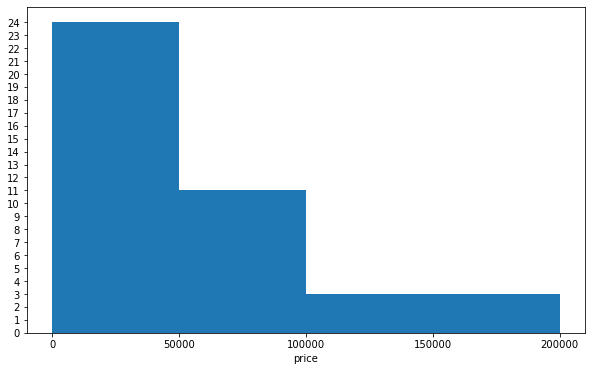

In [149]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
freq,_,_=ax.hist(mok_pr,bins=4,range=(0,200000))
ax.set_xlabel('price')
ax.set_xticks(np.linspace(0,200000,4+1))
ax.set_yticks(np.arange(0,freq.max()+1))
plt.show()

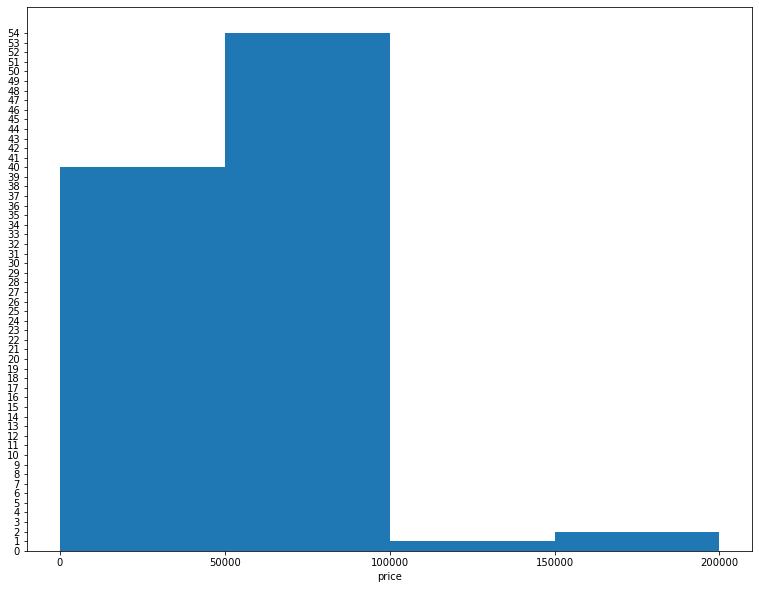

In [150]:
fig = plt.figure(figsize = (13,10))
ax = fig.add_subplot(111)
freq1,_,_=ax.hist(jun_pr,bins=4,range=(0,200000))
ax.set_xlabel('price')
ax.set_xticks(np.linspace(0,200000,4+1))
ax.set_yticks(np.arange(0,freq1.max()+1))
plt.show()